# 數據分析 第一組 期末專題: 
# 影響桃園市各區房價的變數分析及房價預測

### 組員: 張育誠  蕭喬宇  杜旻庭  林佩欣

#### 環境預設

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
import psutil, sys, gc
from scipy import stats
from IPython.display import display, HTML
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets,linear_model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
# 定義函數以便執行肩並肩的列印
def side_by_side(*objs, **kwds):
    from pandas.io.formats.printing import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print (adjoin(space, *reprs))
    print()
    return


# setting params
params = {'legend.fontsize': 'x-large','figure.figsize': (20, 10),
         'axes.labelsize': 'x-large', 'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large', 'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
sns.set_style('whitegrid')
def chinese():
    import platform
    if platform.system() == 'Windows':
        # plt.rcParams['font.sans-serif'] = ['SimHei'] # 步驟一（替換sans-serif字型）
        plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
        plt.rcParams['axes.unicode_minus'] = False  # 步驟二（解決座標軸負數的負號顯示問題）
    else:
        # plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
        # mpl.rcParams['font.family'] = ['Heiti TC']
        plt.rcParams['font.family'] = ['Heiti TC']
def english():
    # mpl.style.use('classic')
    plt.rcParams['font.sans-serif'] = ['DejaVu']

%config InlineBackend.figure_format ='retina'
%matplotlib inline

## 緒論

#### (a)Project proposal "影響桃園市各區房價的變數分析及房價預測"
#### (b)Problem statement and motivation"
    1. Problem statement:隨著社會發展，經濟起飛，當人們在生活上擁有了一定的經濟能力過後，開始追求物質上的享受，而在這樣的過程當中，投資變成了理財工具，其中土地就是工具之一，判斷未來地區發展潛能，以及相關食衣住行育樂方便性的原則問題去決定未來潛力，而在這次專題上，我們選擇在桃園市收集數據，並透過「食衣住行育樂」六項指標去分析並比較桃園13區各區的房價，透過不同的比重去分析13區，透過視覺化建模，分析結果，預測
    2. motivation:我們以自身的需求為出發點，尋找生活周遭各種細節與問題，並搜尋可用的數據來源，發現政府其實提供很多生活上的數據，例如交通、教育、飲食等，看似平常普通不被注意的數據，其實隱藏著大大的學問，因此我們想做一個專題能綜合以上數據的應用，將不同領域結合且融會出一個全新且實用的數據分析，便以整個桃園市為主軸，以黃金住宅區(高房價)來分析在桃園市中，影響房價的主要生活機能變因為何，除了想發現更多意想不同的結果外，也想了解桃園這個城市真正的魅力及面貌，並加深我們對於多種變因的操作技巧。
#### (c)Anticipated outcomes
    1.表格化黃金住宅區
    以區為單位，將依照桃園市13個區不同房價高低作排列,
    2.KDE
    3.提供輸入必要之相關變因數值，預測相對應的房價
#### (d)Data sources supplied to the proposed project
    1.以生活條件最相關的考量因素，「食、衣、住、行、育、樂」為主軸搜尋相關的資料
    2.食(區域內餐廳及小吃攤數量) 、衣(服飾店數量及品牌種類) 、住(房價、治安、公共設施) 、行(大眾交通運輸分布情況) 、育(學校數量) 、樂(大型商場(圈) 、遊樂場)
    3.各區與都市(台北市)的最短距離 
#### (e)Short essay on the selected learning model(s)
    相關係數、線性回歸、決策樹上的回歸、回歸績效評估、交叉驗證的網格搜索


#### 匯入統計資料

In [3]:
liveDF= pd.read_excel('.//Data/live.xlsx', skiprows = 0, sheet_name = None)
liveavgDF=pd.read_excel('.//Data/liveavg.xlsx')
transDF=pd.read_excel('.//Data/trans.xlsx')
foodDF=pd.read_excel('.//Data/food.xlsx')
teachDF=pd.read_excel('.//Data/teach.xlsx')
funDF=pd.read_excel('.//Data/fun.xlsx')
finalDF=pd.read_excel('.//Data/data.xlsx')

## 數據顯示

### 食

#### 統計各區對於公有零售市場、夜市、商圈、便利商店、住宿餐飲甚至是APP等等，提供食物之場所的數量

In [4]:
foodDF

,地區,公有零售市場,夜市,商圈,好客app店家,便利商店數量,住宿及餐飲,總計
0,桃園區,2,1,3,300,234,1691,2231
1,中壢區,1,1,3,245,255,1720,2225
2,平鎮區,1,0,0,43,102,523,669
3,八德區,2,1,1,58,89,468,619
4,楊梅區,3,0,1,39,72,16,131
5,大溪區,2,0,1,74,41,280,398
6,蘆竹區,2,0,0,55,94,503,654
7,龍潭區,1,1,1,50,71,428,552
8,龜山區,2,0,0,40,110,629,781
9,大園區,2,0,1,34,58,224,319


### 住

#### 大致蒐集 桃園市各區房價，其中包含電梯住宅、透天厝、套房、店面等等，而此專題主要著重在電梯住宅的房價

#### Excel檔中有分頁(sheet)，將三分頁分別顯示

In [5]:
xls=pd.ExcelFile('.//Data/live.xlsx')
xls.sheet_names

['各區高低', '樂屋網', '信義房屋']

#### 由樂屋網 查找到的數據

In [6]:
liveDF.get('樂屋網')

,Unnamed: 0,中壢區（320）,Unnamed: 2,Unnamed: 3,Unnamed: 4,平鎮區（324）,Unnamed: 6,Unnamed: 7,Unnamed: 8,龍潭區（325）,...,Unnamed: 43,Unnamed: 44,大園區（337）,Unnamed: 46,Unnamed: 47,Unnamed: 48,蘆竹區（338）,Unnamed: 50,Unnamed: 51,Unnamed: 52
0,NaN,電梯住宅,透天厝,套房,店面,電梯住宅,透天厝,套房,店面,電梯住宅,...,套房,店面,電梯住宅,透天厝,套房,店面,電梯住宅,透天厝,套房,店面
1,平均(萬),20.78,23.49,19.96,37.73,16.18,18.42,13.8,28.64,14.26,...,0,7.39,22.15,22.79,20.59,35.06,20.86,19.94,22.4,33.62
2,資料量,7988,1770,1276,262,2533,1352,101,91,893,...,0,1,1335,460,29,41,2998,441,170,58
3,地址,中壢區同慶路,中壢區中山路270巷,中壢區新興路,中壢區龍和三街,平鎮區中正二路,平鎮區育達路,平鎮區中豐路,平鎮區龍平路,龍潭區新龍路,...,0,華陵里,大觀路600巷,圳頭路,中正東路444巷,永興路,中山路,金海街2巷,南順六街,海湖東路
4,最低(萬),2.2,0.4,0.5,8.1,2.6,1,5.7,1.6,1.9,...,0,7.4,3.6,0.2,6.5,15.4,3.5,1.1,4.8,12.3
5,地址,中壢區大勇三街,中壢區中和路,中壢區中央西路二段,中壢區日新路,平鎮區新榮路,平鎮區中豐路南勢二段,平鎮區民族路二段,平鎮區中豐路南勢一段,龍潭區百年路,...,0,NaN,致遠一路,中山南路二段,大成路二段,新生路四段,大興路,立德街1巷10弄,南福街,忠孝西路
6,最高(萬),13.2,244.6,58.6,264.9,31.1,111.6,19.8,55.9,30.3,...,0,NaN,64.9,1049,28.1,83.3,166,168,35.5,101.9


#### 在信義房屋中查找到的數據

In [7]:
liveDF.get('信義房屋')

,Unnamed: 0,中壢區（320）,Unnamed: 2,Unnamed: 3,Unnamed: 4,平鎮區（324）,Unnamed: 6,Unnamed: 7,Unnamed: 8,龍潭區（325）,...,Unnamed: 43,Unnamed: 44,大園區（337）,Unnamed: 46,Unnamed: 47,Unnamed: 48,蘆竹區（338）,Unnamed: 50,Unnamed: 51,Unnamed: 52
0,NaN,電梯住宅,透天厝,套房,店面,電梯住宅,透天厝,套房,店面,電梯住宅,...,套房,店面,電梯住宅,透天厝,套房,店面,電梯住宅,透天厝,套房,店面
1,平均(萬),20.8,23.9,20.1,0,16.2,18.8,13.8,0,14.3,...,0,0,22.1,21.8,20.5,0,21.1,20.2,22.5,0
2,資料量,7606,1603,1269,0,2522,1234,99,0,896,...,0,0,1349,481,29,0,2879,415,165,0


#### 顯示各區 房價高低的路段

In [8]:
liveDF.get('各區高低')

,類別,價格類別,地址,價格類別.1,地址.1,類別.1,價格類別.2,地址.2,價格類別.3,地址.3
0,套房,高,中壢區新興路,低,中壢區中央西路二段,店面,高,中壢區龍和三街,低,中壢區日新路
1,套房,高,平鎮區中豐路,低,平鎮區民族路二段,店面,高,平鎮區龍平路,低,平鎮區中豐路南勢一段
2,套房,高,龍潭區民治三街,低,龍潭區中正路黎園巷,店面,高,龍潭區中豐路上林段,低,龍潭區北龍路
3,套房,高,楊梅區梅獅路二段,低,楊梅區東森路53巷,店面,高,楊梅區永平路,低,楊梅區大成路
4,套房,高,無,低,無,店面,高,新屋區中山西路二段,低,新屋區民族路六段
5,套房,高,觀音區敬業街83巷,低,觀音區一心路,店面,高,觀音區中興路,低,觀音區中山路
6,套房,高,桃園區鎮江街,低,桃園區中華路,店面,高,桃園區慈光街,低,桃園區中正路
7,套房,高,龜山區萬壽路,低,龜山區文化三路,店面,高,龜山區長壽路,低,龜山區文化三路
8,套房,高,八德區中華路275巷,低,八德區和平路,店面,高,八德區介壽路一段,低,八德區介壽路一段
9,套房,高,大溪區康莊路五段,低,大溪區員林路一段,店面,高,大溪區中正東路,低,大溪區和平路


### 樂

#### 各區能提供娛樂之場所的數量，如電影院、百貨公司、運動中心、環境教育館、市場、圖書館等

In [10]:
funDF

,地區,電影,百貨公司,遊樂場,運動中心,環境教育館,市場,圖書館,總共
0,桃園區,4,3,0,3,1,2,6,19
1,中壢區,4,3,0,1,2,2,3,15
2,平鎮區,0,0,0,2,0,1,2,5
3,八德區,2,1,0,0,0,2,2,7
4,楊梅區,0,0,0,0,1,3,3,7
5,大溪區,0,0,0,0,2,2,2,6
6,蘆竹區,1,1,0,1,0,2,4,9
7,龍潭區,0,0,1,0,2,1,1,5
8,龜山區,0,0,0,0,0,2,4,6
9,大園區,0,0,0,0,0,2,2,4


### 交通

#### 統計各區的免費市民公車、經過各區的火車站、捷運站數量及ubike停放點數量

In [11]:
transDF

,Unnamed: 0,免費公車,火車,捷運,ubike,合計
0,桃園區,12,1,0,86,99
1,中壢區,9,2,6,91,108
2,平鎮區,9,0,0,26,35
3,八德區,8,0,0,31,39
4,楊梅區,9,4,0,11,24
5,大溪區,3,0,0,9,12
6,蘆竹區,9,0,2,28,39
7,龍潭區,10,0,0,13,23
8,龜山區,8,0,3,41,52
9,大園區,8,0,7,11,26


### 教育

#### 統計各區幼稚園、國民小學、國民中學、高級中等學校、專科大學及大學數量

In [12]:
teachDF

,Unnamed: 0,幼兒園,國民\n小學,國民\n中學,高級中等學校,專科\n學校,大學,統計
0,1桃園區,137,23,15,6,0,1,182
1,2中壢區,146,23,11,6,1,3,190
2,3平鎮區,81,14,7,4,0,1,107
3,4八德區,38,9,3,2,0,0,52
4,5楊梅區,59,14,9,4,0,0,86
5,6大溪區,34,14,2,2,0,0,52
6,7蘆竹區,80,14,4,1,0,1,100
7,8龍潭區,45,11,5,3,0,0,64
8,9龜山區,58,17,4,3,0,3,85
9,10大園區,24,12,2,2,0,0,40


### 總整理

#### 利用各數據的總和 做出表

In [13]:
finalDF

,Unnamed: 0,food,live,traffic,recreation,education
0,桃園區,2231,20.425,99,19,182
1,中壢區,2225,20.370,108,15,190
2,平鎮區,669,14.990,35,5,107
3,八德區,619,16.400,39,7,52
4,楊梅區,131,11.895,24,7,86
5,大溪區,398,12.645,12,6,52
6,蘆竹區,654,21.630,39,9,100
7,龍潭區,552,13.145,23,5,64
8,龜山區,781,22.315,52,6,85
9,大園區,319,21.370,26,4,40


## 依照房價高低做排序

In [14]:
HoursePriceDF= finalDF.drop(['food','traffic','recreation','education'],axis=1)
HoursePriceDF

,Unnamed: 0,live
0,桃園區,20.425
1,中壢區,20.370
2,平鎮區,14.990
3,八德區,16.400
4,楊梅區,11.895
5,大溪區,12.645
6,蘆竹區,21.630
7,龍潭區,13.145
8,龜山區,22.315
9,大園區,21.370


In [16]:
HoursePriceDF=HoursePriceDF.sort_values('live',ascending=False) 
HoursePriceDF.reset_index(drop=True)

,Unnamed: 0,live
0,龜山區,22.315
1,蘆竹區,21.630
2,大園區,21.370
3,桃園區,20.425
4,中壢區,20.370
5,觀音區,16.665
6,八德區,16.400
7,平鎮區,14.990
8,新屋區,14.080
9,龍潭區,13.145


#### 我們在表中可得知 房價最高的依序是龜山區、蘆竹區、大園區，再來才是我們熟悉的桃園區，這與我們預想的以為繁華熱鬧的桃園區和中壢區 會是房價高的前一二名，有極大的落差，而我們從這裡著手探討，影響房價的因素為何

## 相關係數分析

#### 將上面收集到的數據 做相關係數的分析及觀察

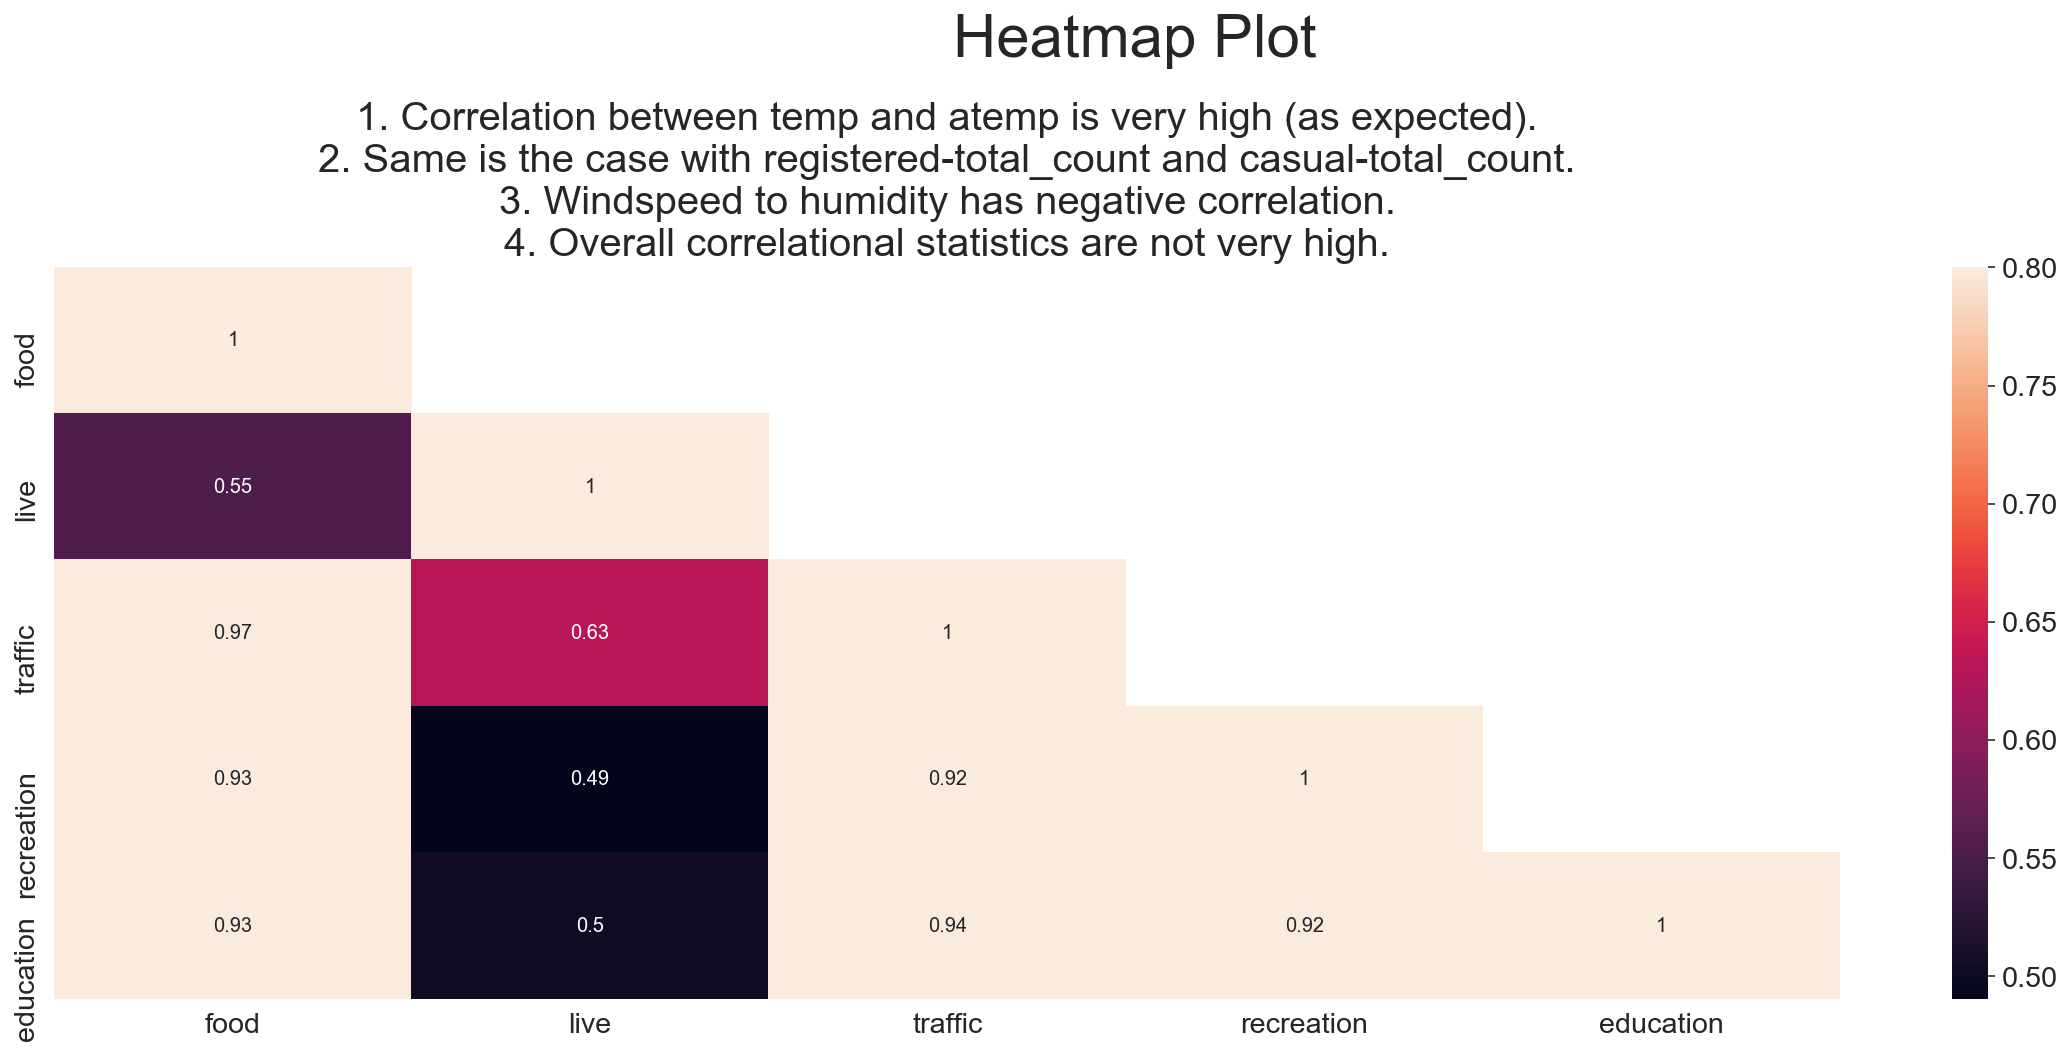

In [17]:
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle("Heatmap Plot", fontsize=30)
fig.subplots_adjust(top=0.76) 
ax.set_title("1. Correlation between temp and atemp is very high (as expected).\n"+
             "2. Same is the case with registered-total_count and casual-total_count.\n"+
             "3. Windspeed to humidity has negative correlation.\n"+
             "4. Overall correlational statistics are not very high.", fontsize=20)
corrcoef = finalDF.corr()
mask = np.array(corrcoef)
mask[np.tril_indices_from(mask)] = False
# sns.heatmap(corrcoef, mask=mask, vmax=.8, square=True, annot=True, ax=ax)
sns.heatmap(corrcoef, mask=mask, vmax=.8, annot=True, ax=ax)
plt.show();

#### 我們發現 ，房價的高低，與其他生活機能，沒有明顯特定對某一項有高度正相關，討論過後決定將相對的地理位置也加入參考變數中，於是新增了一列:各區與都市(這裡以台北市為例)的最短距離數據

#### 各區與都市(台北市)的最短距離

In [18]:
c_distanceDF=pd.read_excel('.//Data/cDistance.xlsx')
c_distanceDF

,Unnamed: 0,city distance
0,桃園區,31.1
1,中壢區,42.3
2,平鎮區,42.6
3,八德區,33.1
4,楊梅區,51.4
5,大溪區,38.3
6,蘆竹區,32.5
7,龍潭區,48.1
8,龜山區,24.7
9,大園區,45.6


#### 合併至finalDF表格中

In [19]:
finalDF['city distance']=c_distanceDF['city distance']
finalDF

,Unnamed: 0,food,live,traffic,recreation,education,city distance
0,桃園區,2231,20.425,99,19,182,31.1
1,中壢區,2225,20.370,108,15,190,42.3
2,平鎮區,669,14.990,35,5,107,42.6
3,八德區,619,16.400,39,7,52,33.1
4,楊梅區,131,11.895,24,7,86,51.4
5,大溪區,398,12.645,12,6,52,38.3
6,蘆竹區,654,21.630,39,9,100,32.5
7,龍潭區,552,13.145,23,5,64,48.1
8,龜山區,781,22.315,52,6,85,24.7
9,大園區,319,21.370,26,4,40,45.6


#### 再次進行相關係數的觀察

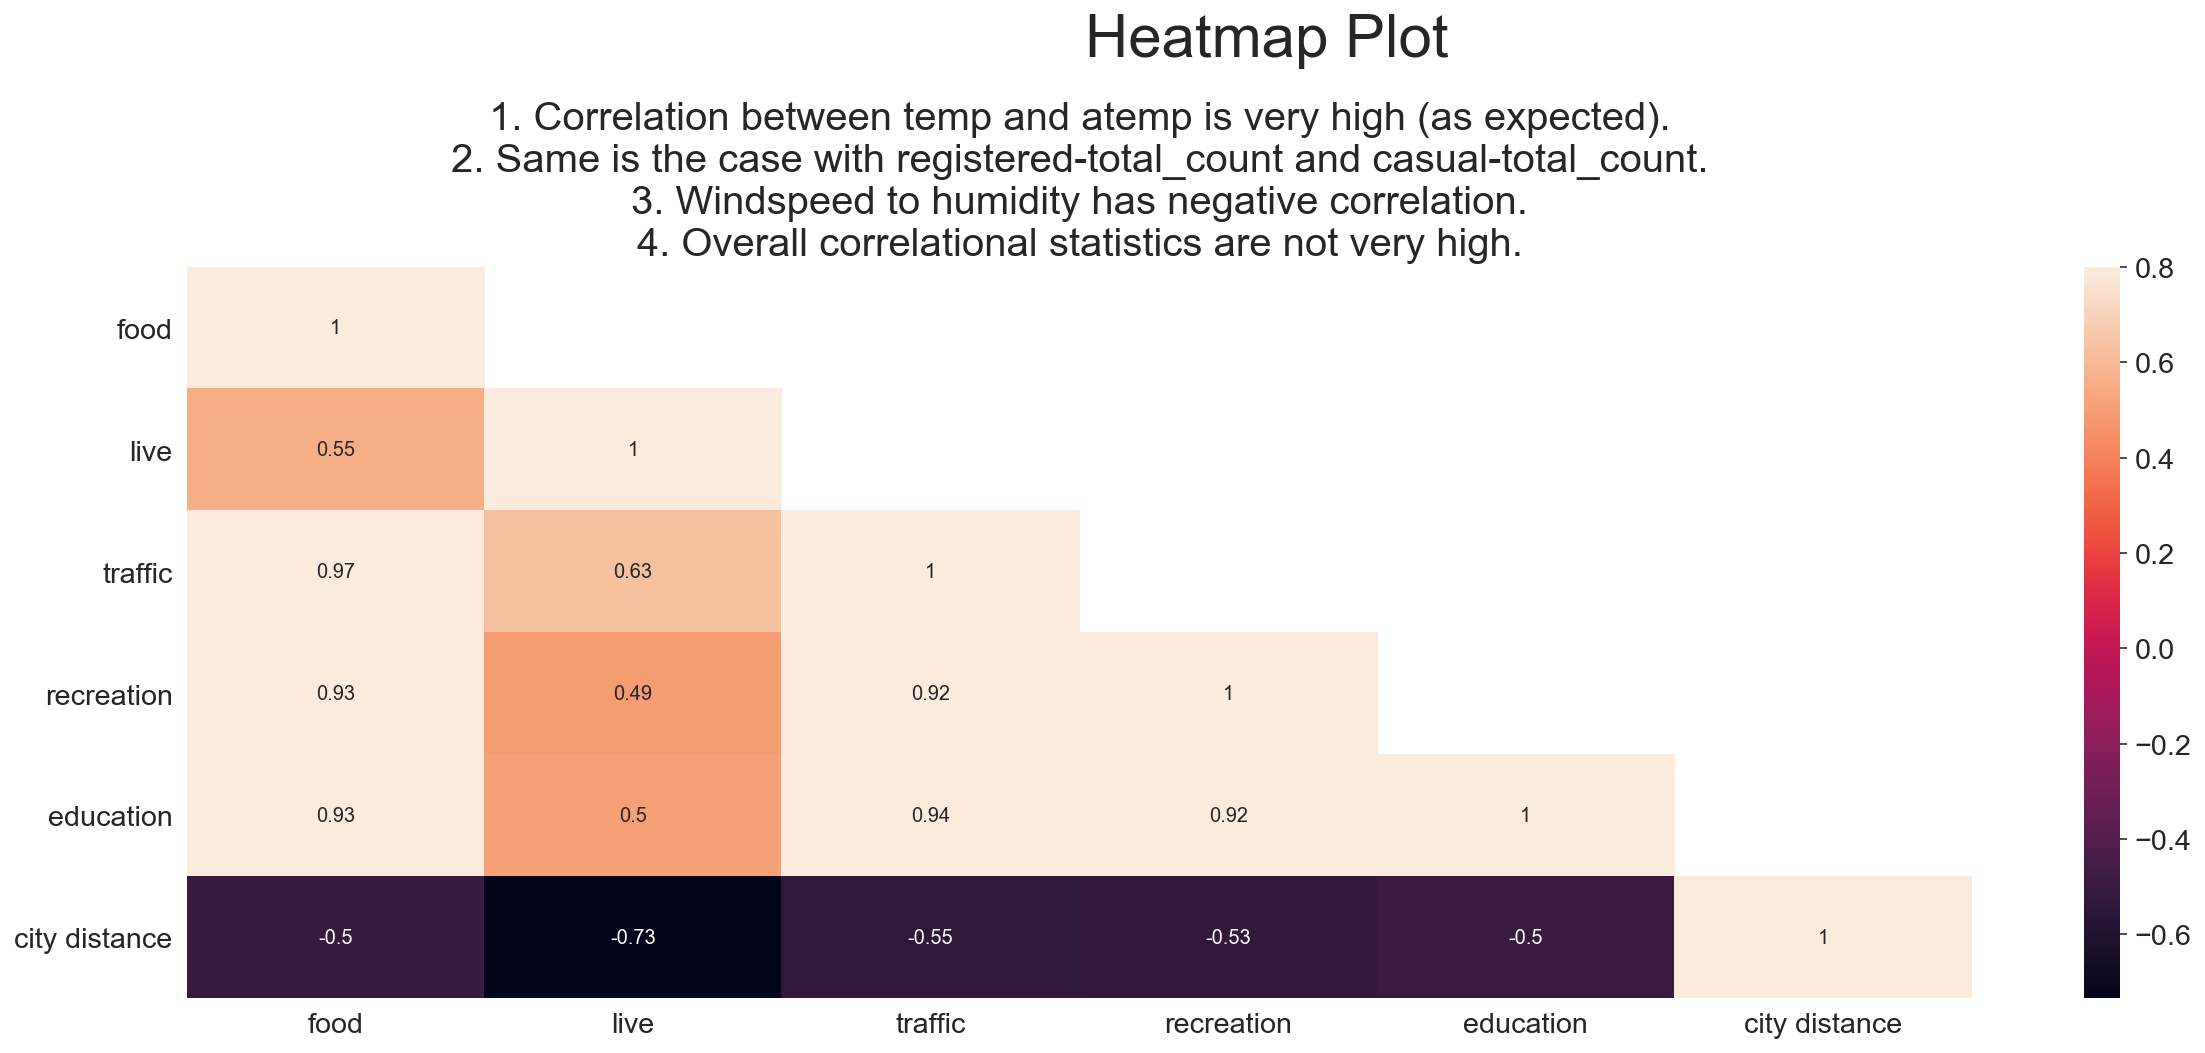

In [20]:
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle("Heatmap Plot", fontsize=30)
fig.subplots_adjust(top=0.76) 
ax.set_title("1. Correlation between temp and atemp is very high (as expected).\n"+
             "2. Same is the case with registered-total_count and casual-total_count.\n"+
             "3. Windspeed to humidity has negative correlation.\n"+
             "4. Overall correlational statistics are not very high.", fontsize=20)
corrcoef = finalDF.corr()
mask = np.array(corrcoef)
mask[np.tril_indices_from(mask)] = False
# sns.heatmap(corrcoef, mask=mask, vmax=.8, square=True, annot=True, ax=ax)
sns.heatmap(corrcoef, mask=mask, vmax=.8, annot=True, ax=ax)
plt.show();

#### 我們採用了兩個相關係數最高和最低之變數，交通以及與城市的距離。
#### 交通為0.63 與城市的距離為-0.73 

### 取與房價(live) 高度正相關/負相關之特徵

#### 與城市的距離和房價的關係

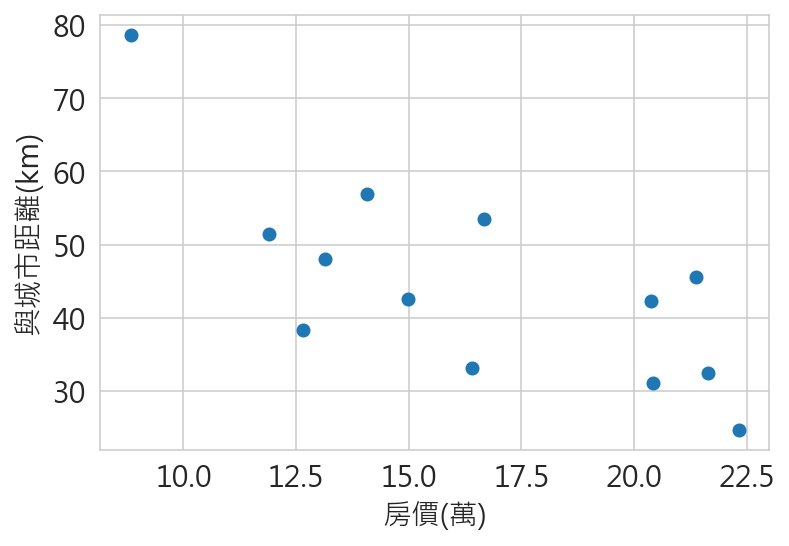

In [21]:
chinese()
X = finalDF['live']
Y = finalDF['city distance'] 
regr=linear_model.LinearRegression()
plt.xlabel('房價(萬)')
plt.ylabel('與城市距離(km)')
model = LinearRegression(fit_intercept=True)
model.fit(X[:, np.newaxis], Y)
plt.scatter(X, Y)

#### 可以顯示出 距離都市越近 房價就越高

#### 交通與房價的關係

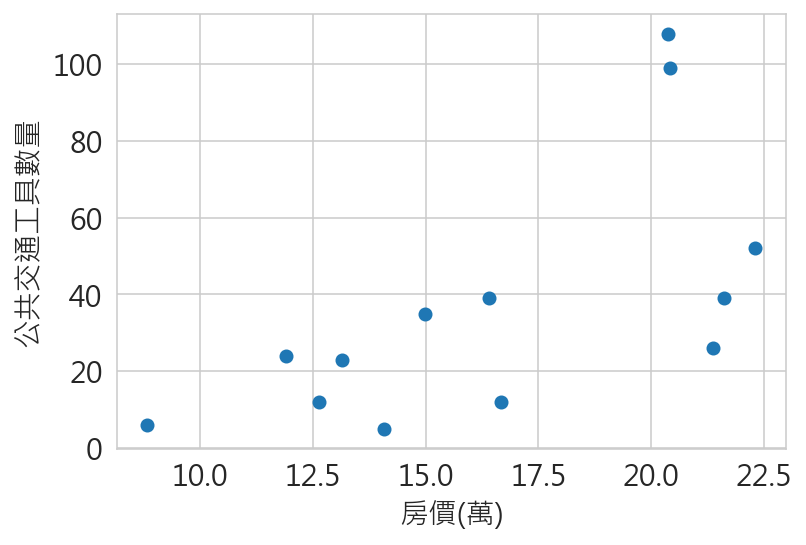

In [32]:
chinese()
X = finalDF['live']
Y = finalDF['traffic'] 
regr=linear_model.LinearRegression()
plt.xlabel('房價(萬)')
plt.ylabel('公共交通工具數量')
model = LinearRegression(fit_intercept=True)
model.fit(X[:, np.newaxis], Y)
plt.scatter(X, Y)

#### 由此可知，公共交通工具較多的區域，房價較高

### 利用迴歸係數做房價的預測

#### 利用我們觀察到的 兩項變數:交通和與都市的距離，想試試是否能由此變數預測房價

#### 建立變數值
##### 公共交通工具數量和與都市的距離 放在 feature中

In [24]:
feature= finalDF.drop(['Unnamed: 0','food','live','education','recreation'],axis=1)
feature

,traffic,city distance
0,99,31.1
1,108,42.3
2,35,42.6
3,39,33.1
4,24,51.4
5,12,38.3
6,39,32.5
7,23,48.1
8,52,24.7
9,26,45.6


##### 房價放在price中

In [33]:
price=finalDF['live']
price

0     20.425
1     20.370
2     14.990
3     16.400
4     11.895
5     12.645
6     21.630
7     13.145
8     22.315
9     21.370
10    16.665
11    14.080
12     8.830
Name: live, dtype: float64

#### 房價做基本運算 並觀察

In [26]:
price.describe()

count    13.000000
mean     16.520000
std       4.364163
min       8.830000
25%      13.145000
50%      16.400000
75%      20.425000
max      22.315000
Name: live, dtype: float64

### T檢定與p-value

#### 在課程中有提到，當我們樣本數不多時(n<30)，需要確定兩個獨立樣本數據組之間是否存在統計學上的顯著差異時，可以使用t檢定；並觀察p-value是否<0.5，>0.05在統計學上代表不顯著，會不參考其數據

In [29]:
tValue, pValue = stats.ttest_ind(feature['traffic'], price, equal_var=True)
if pValue < 0.05:
    side_by_side("p value is "+str(np.round(pValue,3)), "Reject 'The sales difference is NOT significant.'")
else:
    side_by_side("p value is "+str(np.round(pValue,3)), "Can not reject 'The sales difference is NOT significant.'")

'p value is 0.035'    "Reject 'The sales difference is NOT significant.'"



In [30]:
tValue, pValue = stats.ttest_ind(feature['city distance'], price, equal_var=True)
if pValue < 0.05:
    side_by_side("p value is "+str(np.round(pValue,3)), "Reject 'The difference is NOT significant.'")
else:
    side_by_side("p value is "+str(np.round(pValue,3)), "Can not reject 'The difference is NOT significant.'")

'p value is 0.0'    "Reject 'The sales difference is NOT significant.'"



#### 在p-value中 交通為0.035，與都市的距離為0.0 ，虛無假設會被否定並不可接受

### 建立基礎模型

#### 分割比例為:80%的數據用於訓練，20%用於測試；設定random_state=22

In [27]:
X_train, X_test, y_train, y_test = train_test_split(feature, price, test_size=0.2, random_state=22)

side_by_side("Training set: data:{} and target:{}".format(X_train.shape,y_train.shape),
             "Testing set: data:{} and target:{}".format(X_test.shape,y_test.shape))

'Training set: data:(10, 2) and target:(10,)'    'Testing set: data:(3, 2) and target:(3,)'



#### 迴歸係數分數

In [34]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)
LR.score(X_test,y_test)

0.9206948145251567

#### 0.92的分數 還不錯，但也有可能是我們的資料量過低而導致train 和 test 的數量及次數不夠多，此模型還不夠成熟完善

### 測驗模型

### 預測確定係數(coefficient of determination)
#### Lecture 5 (1.2)
#### 利用 𝑅2作分析，可能的最高得分為1.0，並且可能為負(因為該模型執行的很差)。

In [39]:
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score

#### 查找最佳的model，交叉驗證的網格搜索

#### Leture 5 的內容(3.3.1)

In [132]:
from sklearn.model_selection import KFold,GridSearchCV #爆力搜尋,網格搜尋
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import make_scorer

def search_model(X, y):
    cross_validator = KFold()
    regressor = DecisionTreeRegressor()
    params = {'max_depth':[2]} 
    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cross_validator)
    grid = grid.fit(X, y)
    return grid.best_estimator_

In [140]:
best_reg = search_model(X_train, y_train)

### 實際預測

In [141]:
testData = [[5,56.9],[99,31.1]] #假設顧客選擇的[公共交通工具數量,與都市的距離]

result = best_reg.predict(testData)
for i, price in enumerate(result):
    side_by_side( "第{}位顧客預估房價: {}萬/坪".format(i+1, price))

'第1位顧客預估房價: 15.372499999999999萬/坪'

'第2位顧客預估房價: 21.456666666666667萬/坪'



## 心得與討論

#### 本專題此次透過食、衣、住、行等四個因素，分析桃園市共十三區會影響相關房價變數，其中食部分，透過Google Map收集各區相關餐飲品牌及在地特色小吃，其中以「桃園區」及「中壢區」的餐飲分佈總量遠遠超過其他區，而在衣的部分，我們也是透過Google Map收集各區相關服飾品牌以及個人特色店為數據，其中以「桃園區」及「中壢區」的餐飲分佈總量遠遠超過其他區，住的部分，我們透過相關房地產業所整理的近兩年成交價去做收集，在資料總量部分以桃園區以及中壢區交易頻率為最多，這兩區交易總量總量超過破兩萬筆，但也因為這樣，在做迴歸分析的時候，龜山區的房價超越中壢以及桃園區，造成迴歸分析出來的模型失去參考價值，我們也緊急做了修正，添加「距離台北市長短」，此因素參考未來與台北的一日生活圈，並在加入行這個交通因素後，也讓重新做出的迴歸分析模型輔助我們得以做出「影響房價的變數分析」，最後我們也能從結果看出

#### 在這次期末專題成果報告過程當中，從開學一開始我們就不斷思考要做什麼，以及如何利用上課所學應用在專題當中，在當中我們經過不斷的思考並收集數據，從一版「預測桃園市各區的發展潛力」，二版「桃園市各區黃金住宅房價區域分析」，隨著所收集到的資料，最終我們決定做「影響房價的變數分析」。
#### 食衣住行為我們主要考慮因素，在收集資料過程中，到最後運用迴歸係數分析，甚至做出預測模型

#### 我們可以看到基本上所有的數據都呈現正相關，並沒有太大差別，我們也思考到在收集數據上我們可能或有偏頗，例如在收集房價上，龜山的資料顯示房價平均數字大於桃園所呈現的平均數字，由於所收集的資料是近兩年的交易紀錄，正逢大林口生活圈的發展以及相關的捷運開通，導致龜山近期的新屋建案不斷，也導致房價高居不下，甚至超過桃園，也因為這樣我們必須不斷思考，該考慮什麼去調整係數，此外在交通這部分，也因為桃園不斷的開發以及相關捷運開通，因應這樣的開發，我們加入了對大台北的距離參考因素，去分析房價的變數影響，得此於這樣的加入，我們也順利得到足夠差別的正負關係因素，去完成並得到迴歸分析圖，足夠並輔助我們去解釋「影響房價的變數分析」
#### 在製作模型的過程中，我們碰到的挫折也不少，包括一開始的資料收集，和我們愈想的都不一樣，造成很多天的delay，數據還要經過整理才能達到我們能夠順利分析運用的樣子；之後也真的切深感受到我們的數據真的太少了，僅僅13筆，少量的數據資料使我們的model也不是非常完整。這也使我們反思，是否從一開始的資料準備，我們對資料量的細膩度還不夠敏感，導致最後有資料缺乏的現象產生。
#### 製作預測模型時，自己也上網查詢了許多相關資料，反覆看老師的講義，對於決策樹、模型選擇等等才有一點點頭緒和想法，期中的小作業自己就對於相關係數及迴歸係數有一點點熟悉，在這次專題中也有接觸到這些部分，就顯得比較熟練，這也說明，程式是需要反覆的練習才能達到好的效果。

### 專題分工

#### 文案撰寫:張育誠、蕭喬宇
#### 程式及註解撰寫:蕭喬宇
#### 資料收集:張育誠、蕭喬宇、杜旻庭、林佩欣
#### 專題發想:張育誠、蕭喬宇、杜旻庭、林佩欣